In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.models import load_model
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
batch_size = 64
epochs = 10
IMG_SIZE = 150
save_dir='./result'
npy_dir='./npy_file/'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
def load_mnist():
    x_train = np.load(npy_dir+'x_train.npy')
    y_train = np.load(npy_dir+'y_train.npy')
    #x_test  = np.load(npy_dir+'x_test.npy')
    #y_test  = np.load(npy_dir+'y_test.npy')

    print x_train.shape
    print y_train.shape
    #print x_test.shape
    #print y_test.shape
    return (x_train, y_train)#, (x_test, y_test)

In [4]:
(x, y) = load_mnist() #, (X_test, Y_test) = load_mnist()

(12123, 150, 150, 3)
(12123, 20)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print X_train.shape
print Y_train.shape
print X_test.shape
print Y_test.shape

(9698, 150, 150, 3)
(9698, 20)
(2425, 150, 150, 3)
(2425, 20)


In [6]:
number_of_train_samples = len (X_train)
number_of_val_samples =  len (Y_train)

In [7]:
def model_1():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE,IMG_SIZE,3)))
    model.add(Activation('relu'))
    BatchNormalization(axis=-1)
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    BatchNormalization(axis=-1)
    model.add(Conv2D(64,(3, 3)))
    model.add(Activation('relu'))
    BatchNormalization(axis=-1)
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    # Fully connected layer

    BatchNormalization()
    model.add(Dense(512))
    model.add(Activation('relu'))
    BatchNormalization()
    model.add(Dropout(0.2))
    model.add(Dense(20))

    # model.add(Convolution2D(10,3,3, border_mode='same'))
    # model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [8]:
def model_2():
    model = Sequential() 
    model.add(Conv2D(32, (2, 2), input_shape = (IMG_SIZE,IMG_SIZE,3))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 

    model.add(Conv2D(32, (2, 2))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 

    model.add(Conv2D(64, (2, 2))) 
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 

    model.add(Flatten()) 
    model.add(Dense(64)) 
    model.add(Activation('relu')) 
    model.add(Dropout(0.5)) 
    model.add(Dense(20)) 
    model.add(Activation('sigmoid')) 

    model.compile(loss ='binary_crossentropy', optimizer ='rmsprop', metrics =['accuracy']) 
    return model

In [9]:
model = model_2()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
activation_1 (Activation)    (None, 149, 149, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
activation_2 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 35, 64)        8256      
__________

In [10]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [11]:
train_generator = gen.flow(X_train, Y_train, batch_size=batch_size)
test_generator = test_gen.flow(X_test, Y_test, batch_size=batch_size)

In [12]:
# https://datascience.stackexchange.com/questions/29719/how-to-set-batch-size-steps-per-epoch-and-validation-steps

history = model.fit_generator(train_generator,
                    steps_per_epoch= number_of_train_samples / batch_size,
                    epochs=epochs, 
                    validation_data=test_generator,
                    validation_steps=number_of_val_samples / batch_size)

Epoch 1/10
151/151 [==============================] - 86s 569ms/step - loss: 0.2682 - acc: 0.9210 - val_loss: 0.2742 - val_acc: 0.9500
Epoch 2/10
151/151 [==============================] - 75s 496ms/step - loss: 0.1889 - acc: 0.9481 - val_loss: 0.1283 - val_acc: 0.9504
Epoch 3/10
151/151 [==============================] - 71s 473ms/step - loss: 0.1600 - acc: 0.9487 - val_loss: 0.1026 - val_acc: 0.9532
Epoch 4/10
151/151 [==============================] - 72s 479ms/step - loss: 0.1418 - acc: 0.9507 - val_loss: 0.0893 - val_acc: 0.9592
Epoch 5/10
151/151 [==============================] - 74s 488ms/step - loss: 0.1298 - acc: 0.9528 - val_loss: 0.0751 - val_acc: 0.9651
Epoch 6/10
151/151 [==============================] - 73s 481ms/step - loss: 0.1202 - acc: 0.9550 - val_loss: 0.0694 - val_acc: 0.9661
Epoch 7/10
151/151 [==============================] - 73s 481ms/step - loss: 0.1123 - acc: 0.9567 - val_loss: 0.0604 - val_acc: 0.9696
Epoch 8/10
151/151 [==============================] - 7

In [13]:
score = model.evaluate(X_test, Y_test)
print
print('Test accuracy: ', score[1])

2425/2425 [==============================] - 5s 2ms/step

('Test accuracy: ', 0.9788040949143085)


In [14]:
model.save_weights(save_dir+"/model2.h5")
model_json = model.to_json()
with open(save_dir+"/model_json2.json", "w") as json_file:
    json_file.write(model_json)

['acc', 'loss', 'val_acc', 'val_loss']


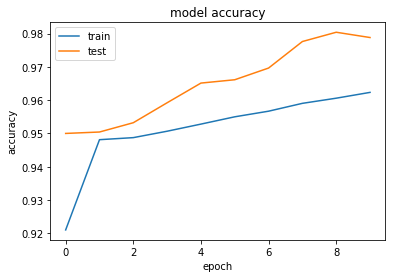

In [15]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

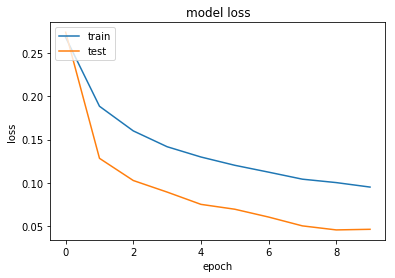

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()